In [1]:
import pandas as pd

In [2]:
#https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [3]:
# from nsepy import get_history as gh
import datetime as dt

In [4]:
# start = dt.datetime(2022,1,1)
# end = dt.datetime(2022,2,8)
# stk_data = gh(symbol='ZOMATO',start=start,end=end)


In [5]:
from NSEDownload import stocks
from datetime import datetime
stk_data = stocks.get_data(stock_symbol="TATACOFFEE", start_date='1-1-2023', end_date='1-1-2024')

In [6]:
stk_data=stk_data[["Open Price","High Price","Low Price","Close Price"]]
#stk_data.to_csv("Tatacoffee13_21.csv")

In [7]:
stk_data

,Open Price,High Price,Low Price,Close Price
Date,,,,
2022-11-27T18:30:00.000Z,227.90,234.50,227.75,231.60
2022-11-28T18:30:00.000Z,231.70,235.80,229.85,230.80
2022-11-29T18:30:00.000Z,231.05,233.85,231.05,232.70
2022-11-30T18:30:00.000Z,233.30,234.00,231.10,232.35
2022-12-01T18:30:00.000Z,233.60,233.75,230.20,231.70
...,...,...,...,...
2023-12-25T18:30:00.000Z,297.00,303.40,296.00,300.15
2023-12-26T18:30:00.000Z,301.70,304.75,300.55,304.10
2023-12-27T18:30:00.000Z,305.00,309.05,304.00,308.40


In [9]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[["Close Price"]])
print("Len:",data1.shape)

Len: (277, 1)


In [10]:
"""from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(stk_data), len(stk_data)-1)
print(y_pred)
from stockFunctions import rmsemape
rmsemape(stkk,predicted_stock_price_test_oriP["Open"])"""

'from statsmodels.tsa.arima.model import ARIMA\nmodel = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)\nmodel_fit = model.fit()\n# make prediction\ny_pred= model_fit.predict(len(stk_data), len(stk_data)-1)\nprint(y_pred)\nfrom stockFunctions import rmsemape\nrmsemape(stkk,predicted_stock_price_test_oriP["Open"])'

In [11]:
orders=[(0,0,0),(0,0,1),(2,0,1),(1,1,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    model = SARIMAX(data1, order=i, seasonal_order=(0,0,0,12))
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)
    

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.63196D-01    |proj g|=  6.76283D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     15      1     0     0   6.762D-05   4.632D-01
  F =  0.46319611351396944     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RMSE-Testset: 0.38452655846512585
maPe-Testset: 0.9963898916967509
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0       

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/subhaarunpandian/anaconda3/envs/dl_env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
 This problem is unconstrained.
/Users/subhaarunpandian/anaconda3/envs/dl_env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/subhaarunpandian/anaconda3/envs/dl_env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-sta


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     71      2     0     0   7.560D-04  -2.364D+00
  F =  -2.3639349370612455     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RMSE-Testset: 0.027380323793575835
maPe-Testset: 242872659363.28122



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/subhaarunpandian/anaconda3/envs/dl_env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


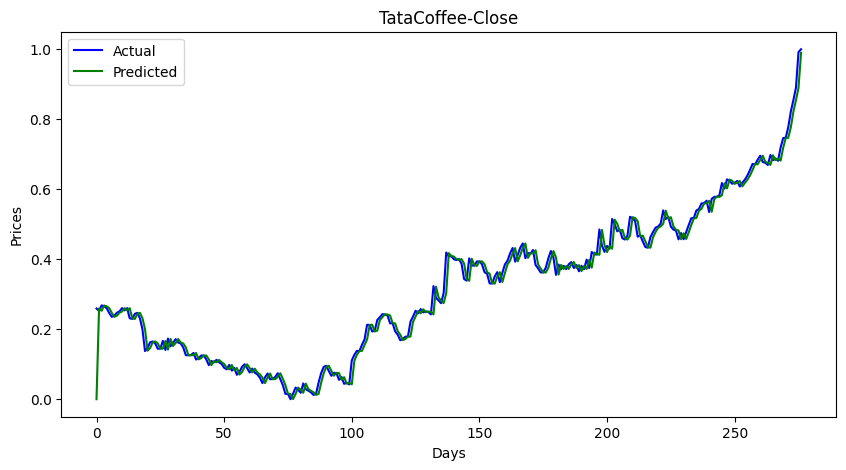

In [12]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","TataCoffee-Close","Days","Prices")

In [13]:
len(data1)

277

In [14]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [15]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

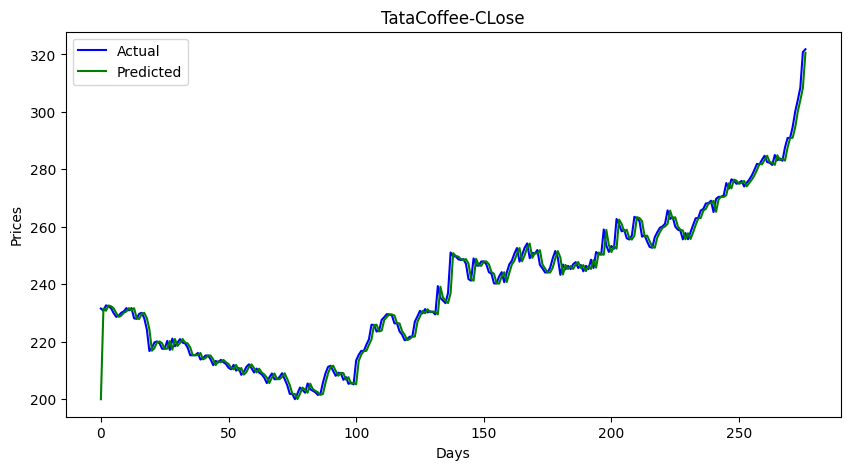

In [16]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-CLose","Days","Prices")

In [17]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 3.3335544218678574
maPe-Testset: 0.008483558474012557


/Users/subhaarunpandian/anaconda3/envs/dl_env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
forecast=model_fit.predict(len(data1), len(data1)+1)

In [19]:
forecast

array([1.00083971, 1.00036892])

In [20]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [21]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [22]:
forecast_stock_price_test_oriF

,Closefore
0,321.902234
1,321.844916


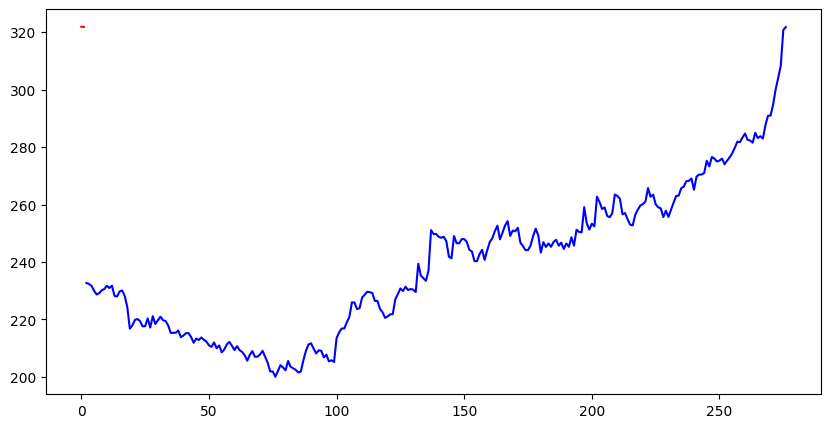

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[2:2225], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")
